In [9]:
import sys
import os
import pandas as pd
import numpy as np
from pandas import ExcelWriter
from pandas import ExcelFile

import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import seaborn as sns

from statistics import mean 
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats

In [25]:
def generate_dictionary_from_TeloLength_and_Chr_aberr_Data(patharg):

    """
    opens raw telomere length count excel files from imageJ analyses and
    extracts the individual mean telomere lengths to make histograms;
    opens chromosome rearrangement frequency files and extracts data
    both telos & chr rearrangement frequencies are stored as values to their
    sample timepoint keys, which themselves are values to patient id# key

    i.e the data structure is:

    dict = {
    patient_IDnumber = 
    {SW#A non irrad: [telos data, chr aberr data], 
    SW#A irrad @ 4 Gy: [telos data, chr aberr data]},

    etc.
    }

    i.e:

    all_patients_dict = {
    '1' = {
    'SW1A non irrad': ['telomere data', 'chr aberr data'],
    'SW1A irrad @ 4 Gy': ['telomere data', ' chr aberr data']},

    etc. for patients 1 - 16 (less #4 missing)
    }

    pass the directory where the telomere length excel files (.xlsx) are located
    """

    all_patients_dict = {}

    for file in os.scandir(patharg):
        if file.name.endswith('.xlsx') and file.name.startswith('~$') == False:
        
            try:
                df = pd.read_excel(file)

            except:
                print('File not found..')
                return -1

            print(file.name, 'in progress..', 'it works peggy!! <3 <3 !!')
           
            if 'chr' not in file.name:
                
                df.rename(columns={'Unnamed: 3':'Mean Individ Telos'}, inplace=True)
                mean_values_of_individual_telomere_lengths = (df['Mean Individ Telos'])
                mean_values_of_individual_telomere_lengths = mean_values_of_individual_telomere_lengths.drop(labels=[5, 192, 379, 566, 753, 940, 1127, 1314,
                    1501, 1688, 1875, 2062, 2249, 2436, 2623, 2810, 2997, 3184, 3371, 3558, 3745, 3932, 4119, 4306, 4493, 4680, 4867, 5054, 5241, 5428,
                    5615, 5802, 5989, 6176, 6363, 6550, 6737, 6924, 7111, 7298, 7485, 7672, 7859, 8046, 8233, 8420, 8607, 8794, 8981, 9168])
            
                mean_values_of_individual_telomere_lengths = mean_values_of_individual_telomere_lengths.iloc[6:9350]
                meantelos_str_toNaN = pd.to_numeric(mean_values_of_individual_telomere_lengths, errors='coerce')
                mean_individual_telos_cleaned = meantelos_str_toNaN.dropna(axis=0, how='any')
                mean_individ_df = mean_individual_telos_cleaned.to_frame(name=None)
                telo_data = mean_individ_df[(np.abs(stats.zscore(mean_individ_df)) < 3).all(axis=1)]

            else:
                continue


            # print(file.name, mean_individ_df.describe(), '\n\n\n',)
            file = file.name.replace('.xlsx', '').rstrip()
            data_list = []
            file_chr = ''

#             if 'hTERT' in file:
#                 file = file.replace(file[2], file[-1])

            num, num2 = capture_patient_sample_ID(file)

            if 'chr' in file:
                file_chr = file
                file = file.replace('chr','').rstrip()

            if file[num:num2] not in all_patients_dict.keys():
                all_patients_dict[file[num:num2]] = {file: []}

                if len(all_patients_dict[file[num:num2]][file]) == 0:
                    all_patients_dict[file[num:num2]][file] = data_list
                    if 'chr' not in file_chr:
                        data_list.append(telo_data)
                        data_list.sort()
                    elif 'chr' in file_chr:
                        data_list.append(chr_data)
                        data_list.sort()

                elif len(all_patients_dict[file[num:num2]][file]) == 1:
                    if 'chr' not in file_chr:
                        data_list.append(telo_data)
                        data_list.sort()
                    elif 'chr' in file_chr:
                        data_list.append(chr_data)
                        data_list.sort()

            elif file[num:num2] in all_patients_dict.keys():
                if file in all_patients_dict[file[num:num2]]:
                    if 'chr' not in file_chr:
                        all_patients_dict[file[num:num2]][file].append(telo_data)
                        all_patients_dict[file[num:num2]][file].sort()
                    elif 'chr' in file_chr:
                        all_patients_dict[file[num:num2]][file].append(chr_data)
                        all_patients_dict[file[num:num2]][file].sort()

                elif file not in all_patients_dict[file[num:num2]]:     
                    all_patients_dict[file[num:num2]][file] = data_list
                    if 'chr' not in file_chr:
                        all_patients_dict[file[num:num2]][file].append(telo_data)
                        all_patients_dict[file[num:num2]][file].sort()
                    elif 'chr' in file_chr:
                        all_patients_dict[file[num:num2]][file].append(chr_data)
                        all_patients_dict[file[num:num2]][file].sort()
                        
    print('completed file collection')
    return all_patients_dict

In [26]:
all_patients_dict = generate_dictionary_from_TeloLength_and_Chr_aberr_Data('.')

SW9A non irrad.xlsx in progress.. it works peggy!! <3 <3 !!
BJ1 for SW9_.xlsx in progress.. it works peggy!! <3 <3 !!
SW11A non irrad.xlsx in progress.. it works peggy!! <3 <3 !!
SW6A non irrad.xlsx in progress.. it works peggy!! <3 <3 !!
SW6A irrad @ 4 Gy.xlsx in progress.. it works peggy!! <3 <3 !!
SW8B.xlsx in progress.. it works peggy!! <3 <3 !!
SW8A irrad @ 4 Gy.xlsx in progress.. it works peggy!! <3 <3 !!
SW5A irrad @ 4 Gy.xlsx in progress.. it works peggy!! <3 <3 !!
SW8C.xlsx in progress.. it works peggy!! <3 <3 !!
SW1A non irrad.xlsx in progress.. it works peggy!! <3 <3 !!
BJ1 for SW11_.xlsx in progress.. it works peggy!! <3 <3 !!
BJ-hTERT for SW9_.xlsx in progress.. it works peggy!! <3 <3 !!
SW9B.xlsx in progress.. it works peggy!! <3 <3 !!
BJ1 for SW8_.xlsx in progress.. it works peggy!! <3 <3 !!
SW3A irrad @ 4 Gy.xlsx in progress.. it works peggy!! <3 <3 !!
SW11A irrad @ 4 Gy.xlsx in progress.. it works peggy!! <3 <3 !!
SW8A non irrad.xlsx in progress.. it works peggy!! <3 <

In [97]:
# print(len('SW2A non irrad'),
#       len('BJ1 for SW2_'),
#       len('BJ-hTERT for SW2_'),
#       len('SW10A non irrad'),
#       len('BJ1 for SW10_'),
#       len('BJ-hTERT for SW10_'),
#       len('SW8B'),
#       len('SW14B'),
#       len('SW1A irrad @ 4 Gy'),
#       len('SW12A irrad @ 4 Gy'),
#       len('BJ-hTERT for SW10_'),
#       len('BJ-hTERT for SW9_')
#      )

# 14 12 17 15 13 18 4 5 17 18 17

14 12 17 15 13 18 4 5 17 18 18 17


In [244]:
# for i in range(1,17):
#     if str(i) in all_patients_dict.keys():
#         for sample in sorted(all_patients_dict[str(i)].keys()):
#             print(sample)

In [240]:
def generate_dataframe_from_dict_and_generate_histograms_stats(all_patients_dict):

    data = []

    for i in range(1,17):
        if str(i) in all_patients_dict.keys():
            for sample in sorted(all_patients_dict[str(i)].keys()):
                #61319 HI PEGGY GIRLLLLLL STEAK 
                telos = all_patients_dict[str(i)][sample][0]
                # chr = all_patients_dict[str(i)[timepoint][1]
                chr_d = 'chr data'
                working_status = 'IT WORKS PEGGY <333'
                
                if 'hTERT' in sample:
                    #average of all hTERT samples is 80.1058
                    #CF = correction factor
                    hTERT_avg = 80.1058
                    hTERT_CF1 = hTERT_avg / np.mean(telos).values
#                     print(i)
#                     print('htert', np.mean(telos).values)
#                     print('htert cf', hTERT_CF1)
                    
#                     np.mean(hTERT_avg.div(telos)).values
                
                elif 'BJ1' in sample:
                    #average of all BJ1 samples is 69.7273
                    #CF = correction factor
                    BJ1_avg = 69.7273
                    BJ1_CF2 = BJ1_avg / np.mean(telos).values
   
                    CF_mean = (hTERT_CF1 + BJ1_CF2) / 2
#                     print('bj1', np.mean(telos).values)
#                     print('bj1 cf', BJ1_CF2)
#                     print(CF_mean)
                    #double check ctrl values...

                
                elif 'non irrad' in sample:
                    num, num2 = capture_patient_sample_ID(sample)
                    SW_A_nonRAD_name = sample
                    SW_A_nonRAD = telos
                    telos_samp = gen_missing_values_andimpute_or_randomsampledown(50, 92, telos, 'rsamp')
                    data.append([sample[num:num2], '1 ' + 'non irrad', (telos_samp.multiply(CF_mean)).values, chr_d, working_status])

                elif 'irrad @ 4 Gy' in sample:
                    num, num2 = capture_patient_sample_ID(sample)
                    SW_A_irrad4Gy_name = sample
                    SW_A_irrad4Gy = telos
                    telos_samp = gen_missing_values_andimpute_or_randomsampledown(50, 92, telos, 'rsamp')
                    data.append([sample[num:num2], '2 ' + 'irrad @ 4 Gy', (telos_samp.multiply(CF_mean)).values, chr_d, working_status])

                elif 'B' in sample:
                    num, num2 = capture_patient_sample_ID(sample)
                    SW_B_name = sample
                    SW_B = telos
                    telos_samp = gen_missing_values_andimpute_or_randomsampledown(50, 92, telos, 'rsamp')
                    data.append([sample[num:num2], '3 ' + 'B', (telos_samp.multiply(CF_mean)).values, chr_d, working_status])
                    
                elif 'C' in sample:
                    num, num2 = capture_patient_sample_ID(sample)
                    SW_C_name = sample
                    SW_C = telos
                    telos_samp = gen_missing_values_andimpute_or_randomsampledown(50, 92, telos, 'rsamp')
                    data.append([sample[num:num2], '4 ' + 'C', (telos_samp.multiply(CF_mean)).values, chr_d, working_status])

                else:
                    print('error with making dataframe from dict..')
                    print(sample)
                    continue

                
            SW_A_nonRAD_samp = gen_missing_values_andimpute_or_randomsampledown(50, 92, SW_A_nonRAD, 'rsamp')
            SW_A_irrad4Gy_samp = gen_missing_values_andimpute_or_randomsampledown(50, 92, SW_A_irrad4Gy, 'rsamp')
            SW_B_samp = gen_missing_values_andimpute_or_randomsampledown(50, 92, SW_B, 'rsamp')
            SW_C_samp = gen_missing_values_andimpute_or_randomsampledown(50, 92, SW_C, 'rsamp')

            SW_A_nonRADarray = SW_A_nonRAD_samp.to_numpy()
            SW_A_irrad4Gyarray = SW_A_irrad4Gy_samp.to_numpy()
            SW_Barray = SW_B_samp.to_numpy()
            SW_Carray = SW_C_samp.to_numpy()


#             n_bins = 50
#             fig, axs = plt.subplots(2, 2, sharey=True, tight_layout=True, figsize=(12.8, 9.6))
        
#             histogram_stylizer_divyBins_byQuartile(fig, axs, n_bins, SW_A_nonRAD_samp, SW_A_nonRADarray, SW_A_nonRAD_name, 0, 0)
#             histogram_stylizer_divyBins_byQuartile(fig, axs, n_bins, SW_A_irrad4Gy_samp, SW_A_nonRADarray, SW_A_irrad4Gy_name, 0, 1)
#             histogram_stylizer_divyBins_byQuartile(fig, axs, n_bins, SW_B_samp, SW_A_nonRADarray, SW_B_name, 1, 0)
#             histogram_stylizer_divyBins_byQuartile(fig, axs, n_bins, SW_C_samp, SW_A_nonRADarray, SW_C_name, 1, 1)


#             plt.savefig(f'SW{sample[2]}_histogram.pdf')
#             plt.show()
                
    
    all_patients_df = pd.DataFrame(data, columns=['patient id', 'timepoint', 'telo data', 'chr data', 'status'])
    all_patients_df['patient id'] = all_patients_df['patient id'].astype('int')
    all_patients_df = all_patients_df.sort_values(by=['patient id', 'timepoint'], ascending=True, axis=0).reset_index(drop=True)
    all_patients_df['telo means'] = all_patients_df['telo data'].apply(lambda row: np.mean(row))
    
    all_patients_df['Q1'] = 'telos nonRAD Q1 <0.25'
    all_patients_df['Q2-3'] = 'telos nonRAD Q2-3 >0.25 & <0.75'
    all_patients_df['Q4'] = 'telos nonRAD Q4 >0.75'

    return all_patients_df
                

In [241]:
sns.set_style(style="darkgrid")
all_patients_df = generate_dataframe_from_dict_and_generate_histograms_stats(all_patients_dict)

In [243]:
all_patients_df.head(8)

,patient id,timepoint,telo data,chr data,status,telo means,Q1,Q2-3,Q4
0,1,1 non irrad,"[[73.91908971083086], [73.91908971083086], [84...",chr data,IT WORKS PEGGY <333,86.035540,telos nonRAD Q1 <0.25,telos nonRAD Q2-3 >0.25 & <0.75,telos nonRAD Q4 >0.75
1,1,2 irrad @ 4 Gy,"[[128.55493862753195], [83.56071010789576], [1...",chr data,IT WORKS PEGGY <333,92.305063,telos nonRAD Q1 <0.25,telos nonRAD Q2-3 >0.25 & <0.75,telos nonRAD Q4 >0.75
2,1,3 B,"[[144.62430595597343], [178.9056229233153], [1...",chr data,IT WORKS PEGGY <333,118.486281,telos nonRAD Q1 <0.25,telos nonRAD Q2-3 >0.25 & <0.75,telos nonRAD Q4 >0.75
3,1,4 C,"[[152.12334404257948], [117.84202707523761], [...",chr data,IT WORKS PEGGY <333,100.798026,telos nonRAD Q1 <0.25,telos nonRAD Q2-3 >0.25 & <0.75,telos nonRAD Q4 >0.75
4,2,1 non irrad,"[[118.78787367683296], [159.71478813691826], [...",chr data,IT WORKS PEGGY <333,121.581190,telos nonRAD Q1 <0.25,telos nonRAD Q2-3 >0.25 & <0.75,telos nonRAD Q4 >0.75
5,2,2 irrad @ 4 Gy,"[[112.79856912169852], [160.71300556277401], [...",chr data,IT WORKS PEGGY <333,135.209229,telos nonRAD Q1 <0.25,telos nonRAD Q2-3 >0.25 & <0.75,telos nonRAD Q4 >0.75
6,2,3 B,"[[110.80213426998705], [173.68983209889862], [...",chr data,IT WORKS PEGGY <333,162.239462,telos nonRAD Q1 <0.25,telos nonRAD Q2-3 >0.25 & <0.75,telos nonRAD Q4 >0.75
7,2,4 C,"[[70.87343723575748], [115.79322139926575], [1...",chr data,IT WORKS PEGGY <333,110.558910,telos nonRAD Q1 <0.25,telos nonRAD Q2-3 >0.25 & <0.75,telos nonRAD Q4 >0.75


In [245]:
### FIND QUARTILES OF NON IRRAD TIMEPOINT & MAKE BASELINE..
### find individual telomeres below the 0.25 percentile (a), between
### the 0.25 & 0.75 percentile (b), & above the 0.75 percentile (c)

def quartile_cts_rel_to_df1(df1, df2):
    df1 = pd.DataFrame(df1)
    df2 = pd.DataFrame(df2)
    
    t = 'Mean Individ Telos'
    
    a = df2[df2 <= df1.quantile(0.25)].count()
    
    b = df2[(df2 > df1.quantile(0.25)) & (df2 < df1.quantile(0.75))].count()

    c = df2[df2 >= df1.quantile(0.75)].count()
    
    return a.values, b.values, c.values


### LOOP THROUGH DATAFRAME FOR EACH PATIENT, ESTABLISH BASELINE QUARTILES FOR INDIVIDUAL TELOMERES USING NON IRRAD 
### SAMPLE TIMEPOINT.. THEN DETERMINES FOR EACH TIMEPOINT (irrad 4 Gy, B, C) HOW MANY TELOMERES REMAIN IN THOSE 
### QUARTILES... FILLS OUT Q1, Q2-3, Q4 COLUMNS..

for i, row in all_patients_df.iterrows():
    if 'non irrad' in row[1]:
        nonRAD = row[2]
        all_patients_df.iat[i, 6], all_patients_df.iat[i, 7], all_patients_df.iat[i, 8] = (quartile_cts_rel_to_df1(nonRAD, nonRAD))
        
    elif 'irrad @ 4 Gy' in row[1]:
        all_patients_df.iat[i, 6], all_patients_df.iat[i, 7], all_patients_df.iat[i, 8] = (quartile_cts_rel_to_df1(nonRAD, row[2]))
        
    elif 'B' in row[1]:
        all_patients_df.iat[i, 6], all_patients_df.iat[i, 7], all_patients_df.iat[i, 8] = (quartile_cts_rel_to_df1(nonRAD, row[2]))
        
    elif 'C' in row[1]:
        all_patients_df.iat[i, 6], all_patients_df.iat[i, 7], all_patients_df.iat[i, 8] = (quartile_cts_rel_to_df1(nonRAD, row[2]))
    
    else:
        print('unknown label in row[1] of the all patients df.. please check patient timepoint names')


In [246]:
### MELT Q1, Q2-3, Q4 COLUMNS INTO ONE.. the relative Q && make new column Q freq counts for it

melted_all_patients_df = pd.melt(
    all_patients_df,
    id_vars = [col for col in all_patients_df.columns if col != 'Q1' and col != 'Q2-3' and col != 'Q4'],
    var_name='relative Q',
    value_name='Q freq counts')


### relative Q refers to which quartile, ala Q1 <0.25, Q2-3 >0.25 & <0.75, Q4 > 0.75

### Q FREQ COUNTS
### counts the number of individual telomeres for each timepoint within the quartiles established 
### by the non irradiated timepoint for each patient 
melted_all_patients_df['Q freq counts'] = melted_all_patients_df['Q freq counts'].astype('float64')

### SEABORN doesn't support plotting between multiple independent variables, i.e the dummy variable columns
### and a target.. so shelf this code for plotting in seaborn
# dummies_df = pd.get_dummies(melted_all_patients_df['timepoint'], drop_first=True)
# dummies_df['Q freq counts'] = melted_all_patients_df['Q freq counts']

melted_all_patients_df.dtypes

patient id         int64
timepoint         object
telo data         object
chr data          object
status            object
telo means       float64
relative Q        object
Q freq counts    float64
dtype: object

In [248]:
melted_all_patients_df.head(8)

,patient id,timepoint,telo data,chr data,status,telo means,relative Q,Q freq counts
0,1,1 non irrad,"[[73.91908971083086], [73.91908971083086], [84...",chr data,IT WORKS PEGGY <333,86.035540,Q1,1195.0
1,1,2 irrad @ 4 Gy,"[[128.55493862753195], [83.56071010789576], [1...",chr data,IT WORKS PEGGY <333,92.305063,Q1,724.0
2,1,3 B,"[[144.62430595597343], [178.9056229233153], [1...",chr data,IT WORKS PEGGY <333,118.486281,Q1,231.0
3,1,4 C,"[[152.12334404257948], [117.84202707523761], [...",chr data,IT WORKS PEGGY <333,100.798026,Q1,372.0
4,2,1 non irrad,"[[118.78787367683296], [159.71478813691826], [...",chr data,IT WORKS PEGGY <333,121.581190,Q1,1166.0
5,2,2 irrad @ 4 Gy,"[[112.79856912169852], [160.71300556277401], [...",chr data,IT WORKS PEGGY <333,135.209229,Q1,481.0
6,2,3 B,"[[110.80213426998705], [173.68983209889862], [...",chr data,IT WORKS PEGGY <333,162.239462,Q1,292.0
7,2,4 C,"[[70.87343723575748], [115.79322139926575], [1...",chr data,IT WORKS PEGGY <333,110.558910,Q1,1182.0


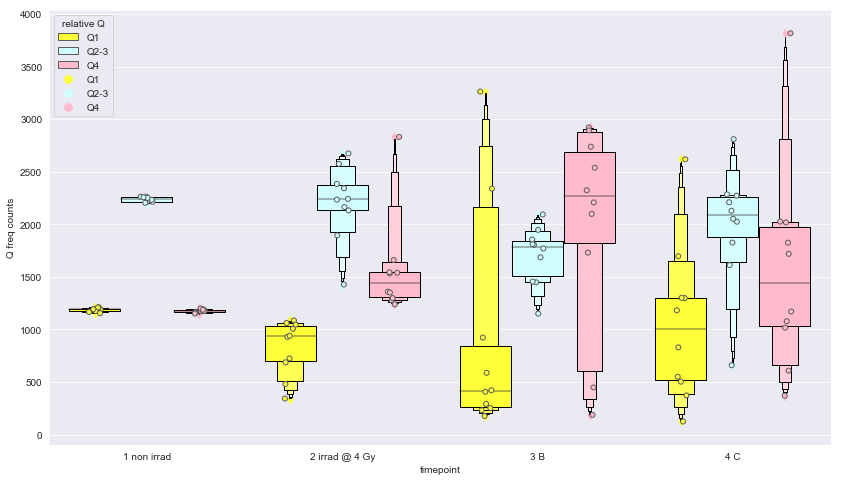

In [255]:
fig = plt.figure(figsize=(14,8))
sns.set_style(style="darkgrid",rc= {'patch.edgecolor': 'black'})
palette ={"Q1":"#fdff38","Q2-3":"#d0fefe","Q4":"#ffbacd"}

sns.boxenplot(x='timepoint', y='Q freq counts', hue='relative Q', data=melted_all_patients_df, palette=palette,
             linewidth=2, saturation=5, color="black")
sns.stripplot(x='timepoint', y='Q freq counts', hue='relative Q', data=melted_all_patients_df, palette=palette,
             linewidth=1, color="black", dodge=True)


### Q freq counts represents the number of individual telomeres at each timepoint
### within the quartiles established by the non irrad timepoint for each patient

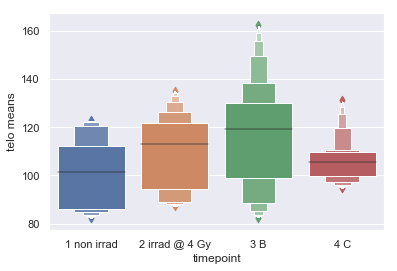

In [263]:
sns.set(style='darkgrid')

# sns.relplot(x="timepoint", y="Q freq counts", 
#             data=melted_all_patients_df, hue='relative Q')

sns.boxenplot(x="timepoint", y="telo means", 
            data=all_patients_df)


In [264]:
y = melted_all_patients_df['telo means']
x = melted_all_patients_df['timepoint']

model = ols('y ~ C(x)', melted_all_patients_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     4.585
Date:                Sat, 22 Jun 2019   Prob (F-statistic):            0.00452
Time:                        09:36:15   Log-Likelihood:                -509.04
No. Observations:                 120   AIC:                             1026.
Df Residuals:                     116   BIC:                             1037.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                101.0530      3.125     32.338      0.000      94.864     107.242
C(x)[T.2 irrad @ 4 Gy]     8.5554      4.419      1.936      0.055      -0.197      17.308
C(x)[T.3 B]               15.9997      4.419      3.620      0.000       7.247      24.753
C(x)[T.4 C]                5.3288      4.419      1.206      0.230      -3.424      14.082
==============================================================================
Omnibus:                        1.233   Durbin-Watson:                   1.253
Prob(Omnibus):                  0.540   Jarque-Bera (JB):                1.240
Skew:                           0.237   Prob(JB):                        0.538
Kurtosis:                       2.850   Cond. No.                         4.79
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [274]:
melted_all_patients_df.head(16)

,patient id,timepoint,telo data,chr data,status,telo means,relative Q,Q freq counts
0,1,1 non irrad,"[[73.91908971083086], [73.91908971083086], [84...",chr data,IT WORKS PEGGY <333,86.035540,Q1,1195.0
1,1,2 irrad @ 4 Gy,"[[128.55493862753195], [83.56071010789576], [1...",chr data,IT WORKS PEGGY <333,92.305063,Q1,724.0
2,1,3 B,"[[144.62430595597343], [178.9056229233153], [1...",chr data,IT WORKS PEGGY <333,118.486281,Q1,231.0
3,1,4 C,"[[152.12334404257948], [117.84202707523761], [...",chr data,IT WORKS PEGGY <333,100.798026,Q1,372.0
4,2,1 non irrad,"[[118.78787367683296], [159.71478813691826], [...",chr data,IT WORKS PEGGY <333,121.581190,Q1,1166.0
5,2,2 irrad @ 4 Gy,"[[112.79856912169852], [160.71300556277401], [...",chr data,IT WORKS PEGGY <333,135.209229,Q1,481.0
6,2,3 B,"[[110.80213426998705], [173.68983209889862], [...",chr data,IT WORKS PEGGY <333,162.239462,Q1,292.0
7,2,4 C,"[[70.87343723575748], [115.79322139926575], [1...",chr data,IT WORKS PEGGY <333,110.558910,Q1,1182.0
8,3,1 non irrad,"[[81.74882395232905], [69.92971687488388], [11...",chr data,IT WORKS PEGGY <333,84.516681,Q1,1190.0
9,3,2 irrad @ 4 Gy,"[[94.55285661956131], [93.56793102977421], [72...",chr data,IT WORKS PEGGY <333,88.516386,Q1,1006.0


In [290]:
### COULD I REMOVE NON RAD TIMEPOINT FROM ANALYSIS?

q = melted_all_patients_df['Q freq counts']
tp = melted_all_patients_df['timepoint']
rq = melted_all_patients_df['relative Q']

# relq = melted_all_patients_df['relative Q']

model = ols('q ~ C(tp)*C(rq)', melted_all_patients_df).fit()

#with Q frequency counts as the dependent variable
#timepoint/relative Q are the inpdependent categorical values

#asking.. does the timepoint alone affect Q freq counts?
#no.. 

print(f"Overall model F({model.df_model: .0f},{model.df_resid: .0f}) = {model.fvalue: .3f}, p = {model.f_pvalue: .4f}")
model.summary()

Overall model F( 11, 108) =  7.028, p =  0.0000


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      q   R-squared:                       0.417
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                     7.028
Date:                Sat, 22 Jun 2019   Prob (F-statistic):           7.15e-09
Time:                        10:42:44   Log-Likelihood:                -932.06
No. Observations:                 120   AIC:                             1888.
Df Residuals:                     108   BIC:                             1922.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                              1187.4000    190.501      6.233      0.000     809.794    1565.006
C(tp)[T.2 irrad @ 4 Gy]                -357.4000    269.409     -1.327      0.187    -891.415     176.615
C(tp)[T.3 B]                           -298.3000    269.409     -1.107      0.271    -832.315     235.715
C(tp)[T.4 C]                           -140.2000    269.409     -0.520      0.604    -674.215     393.815
C(rq)[T.Q2-3]                          1049.6000    269.409      3.896      0.000     515.585    1583.615
C(rq)[T.Q4]                             -11.8000    269.409     -0.044      0.965    -545.815     522.215
C(tp)[T.2 irrad @ 4 Gy]:C(rq)[T.Q2-3]   327.3000    381.002      0.859      0.392    -427.912    1082.512
C(tp)[T.3 B]:C(rq)[T.Q2-3]             -236.5000    381.002     -0.621      0.536    -991.712     518.712
C(tp)[T.4 C]:C(rq)[T.Q2-3]             -108.8000    381.002     -0.286      0.776    -864.012     646.412
C(tp)[T.2 irrad @ 4 Gy]:C(rq)[T.Q4]     744.9000    381.002      1.955      0.053     -10.312    1500.112
C(tp)[T.3 B]:C(rq)[T.Q4]               1131.4000    381.002      2.970      0.004     376.188    1886.612
C(tp)[T.4 C]:C(rq)[T.Q4]                529.4000    381.002      1.389      0.168    -225.812    1284.612
==============================================================================
Omnibus:                       31.983   Durbin-Watson:                   1.326
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              124.585
Skew:                           0.818   Prob(JB):                     8.84e-28
Kurtosis:                       7.716   Cond. No.                         17.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [289]:
melted_all_patients_df_drop_non_irrad = melted_all_patients_df[melted_all_patients_df['timepoint'] != '1 non irrad']
melted_all_patients_df_drop_non_irrad.shape

(90, 8)

In [287]:
### REMOVed NON RAD TIMEPOINT FROM ANALYSIS

q = melted_all_patients_df_drop_non_irrad['Q freq counts']
tp = melted_all_patients_df_drop_non_irrad['timepoint']
rq = melted_all_patients_df_drop_non_irrad['relative Q']

# relq = melted_all_patients_df['relative Q']

model = ols('q ~ C(tp)*C(rq)', melted_all_patients_df_drop_non_irrad).fit()

#with Q frequency counts as the dependent variable
#timepoint/relative Q are the inpdependent categorical values

#asking.. does the timepoint alone affect Q freq counts?
#no.. 

print(f"Overall model F({model.df_model: .0f},{model.df_resid: .0f}) = {model.fvalue: .3f}, p = {model.f_pvalue: .4f}")
model.summary()

Overall model F( 8, 81) =  5.330, p =  0.0000


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      q   R-squared:                       0.345
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     5.330
Date:                Sat, 22 Jun 2019   Prob (F-statistic):           2.20e-05
Time:                        10:42:15   Log-Likelihood:                -711.98
No. Observations:                  90   AIC:                             1442.
Df Residuals:                      81   BIC:                             1464.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                    830.0000    219.945      3.774      0.000     392.378    1267.622
C(tp)[T.3 B]                  59.1000    311.050      0.190      0.850    -559.791     677.991
C(tp)[T.4 C]                 217.2000    311.050      0.698      0.487    -401.691     836.091
C(rq)[T.Q2-3]               1376.9000    311.050      4.427      0.000     758.009    1995.791
C(rq)[T.Q4]                  733.1000    311.050      2.357      0.021     114.209    1351.991
C(tp)[T.3 B]:C(rq)[T.Q2-3]  -563.8000    439.890     -1.282      0.204   -1439.044     311.444
C(tp)[T.4 C]:C(rq)[T.Q2-3]  -436.1000    439.890     -0.991      0.324   -1311.344     439.144
C(tp)[T.3 B]:C(rq)[T.Q4]     386.5000    439.890      0.879      0.382    -488.744    1261.744
C(tp)[T.4 C]:C(rq)[T.Q4]    -215.5000    439.890     -0.490      0.626   -1090.744     659.744
==============================================================================
Omnibus:                       17.950   Durbin-Watson:                   1.285
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.716
Skew:                           0.708   Prob(JB):                     1.06e-08
Kurtosis:                       5.790   Cond. No.                         13.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

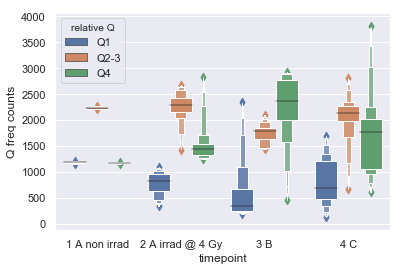

In [36]:
sns.boxenplot(x='timepoint', y='Q freq counts', hue='relative Q', data=melted_all_patients_df)

# fig = plt.figure(figsize=(14,8))
# sns.boxenplot(x='timepoint', y='Q freq counts', hue='relative Q', data=melted_all_patients_df)



In [118]:
q = melted_all_patients_df['Q freq counts']
tp = melted_all_patients_df['timepoint']
relq = melted_all_patients_df['relative Q']

model = ols('q ~ C(tp)*C(relq)', melted_all_patients_df).fit()

#with Q frequency counts as the dependent variable
#timepoint & which quartile are the inpdependent categorical values

#asking.. does the timepoint & relative quartile affect Q freq counts?

print(f"Overall model F({model.df_model: .0f},{model.df_resid: .0f}) = {model.fvalue: .3f}, p = {model.f_pvalue: .4f}")
print(model.summary())

Overall model F( 11, 84) =  10.116, p =  0.0000
                            OLS Regression Results                            
Dep. Variable:                      q   R-squared:                       0.570
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     10.12
Date:                Sat, 15 Jun 2019   Prob (F-statistic):           1.81e-11
Time:                        00:05:06   Log-Likelihood:                -731.81
No. Observations:                  96   AIC:                             1488.
Df Residuals:                      84   BIC:                             1518.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------

In [96]:
res = sm.stats.anova_lm(model, typ= 2)
res

,sum_sq,df,F,PR(>F)
C(tp),4.600555e-22,3.0,5.481466e-28,1.000000e+00
C(relq),2.428721e+07,2.0,4.340656e+01,1.131978e-13
C(tp):C(relq),6.844244e+06,6.0,4.077387e+00,1.227585e-03
Residual,2.350020e+07,84.0,NaN,NaN


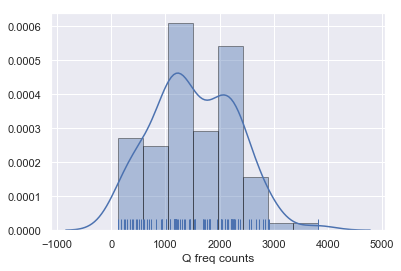

In [112]:
sns.distplot(melted_all_patients_df['Q freq counts'], rug=True)

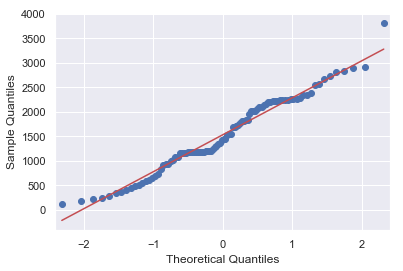

In [105]:
from statsmodels.graphics.gofplots import qqplot
qqplot(melted_all_patients_df['Q freq counts'], line='s')
plt.show()

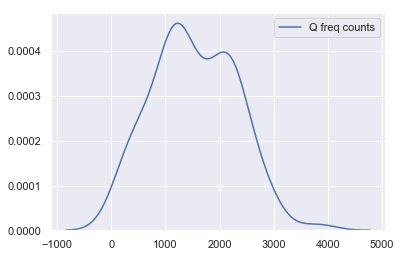

In [111]:
sns.kdeplot(melted_all_patients_df['Q freq counts'])

In [117]:
print(stats.shapiro(melted_all_patients_df['Q freq counts']))
print(stats.normaltest(melted_all_patients_df['Q freq counts']))

data = melted_all_patients_df['Q freq counts']


result = stats.anderson(data)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

(0.9733085632324219, 0.04709954932332039)
NormaltestResult(statistic=1.1977184866669681, pvalue=0.5494380538537487)
Statistic: 0.888
15.000: 0.554, data does not look normal (reject H0)
10.000: 0.631, data does not look normal (reject H0)
5.000: 0.757, data does not look normal (reject H0)
2.500: 0.884, data does not look normal (reject H0)
1.000: 1.051, data looks normal (fail to reject H0)


In [41]:
# melted_all_patients_df

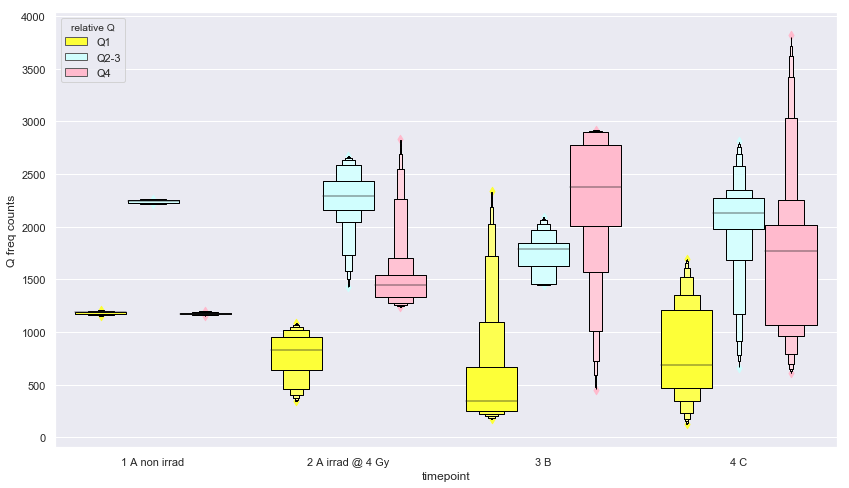

In [87]:
fig = plt.figure(figsize=(14,8))
sns.set_style(style="darkgrid",rc= {'patch.edgecolor': 'black'})
palette ={"Q1":"#fdff38","Q2-3":"#d0fefe","Q4":"#ffbacd"}

sns.boxenplot(x='timepoint', y='Q freq counts', hue='relative Q', data=melted_all_patients_df, palette=palette,
             linewidth=2, saturation=5, color="black")


### Q freq counts represents the number of individual telomeres at each timepoint
### within the quartiles established by the non irrad timepoint for each patient


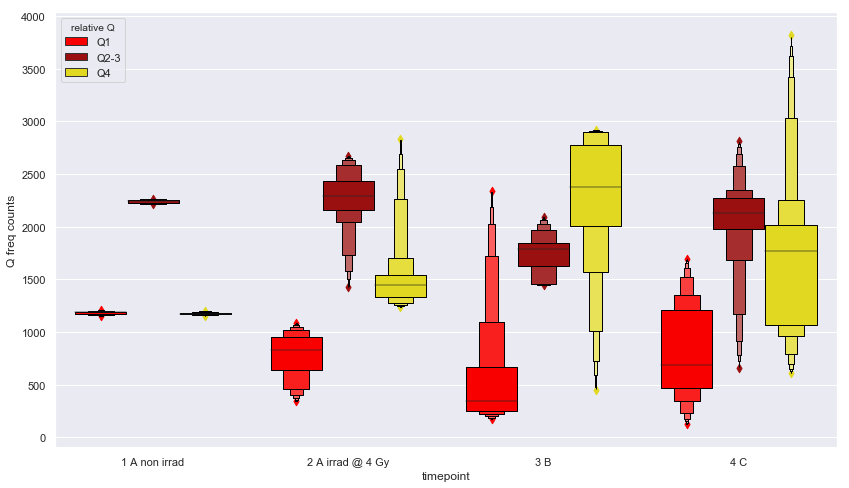

In [94]:
fig = plt.figure(figsize=(14,8))
sns.set_style(style="darkgrid",rc= {'patch.edgecolor': 'black'})
palette ={"Q1":"#f90000","Q2-3":"#9a1010","Q4":"#e1d921"}

sns.boxenplot(x='timepoint', y='Q freq counts', hue='relative Q', data=melted_all_patients_df, palette=palette,
             linewidth=2, saturation=5, color="#e79516")

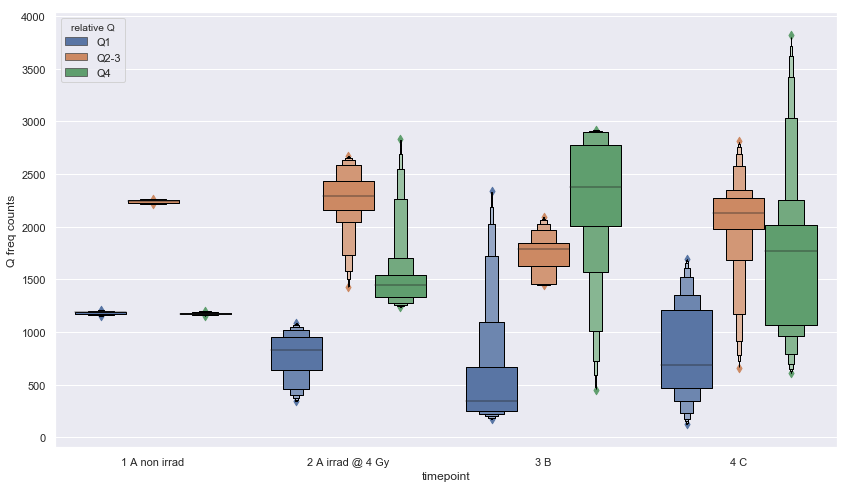

In [88]:
fig = plt.figure(figsize=(14,8))
sns.boxenplot(x='timepoint', y='Q freq counts', hue='relative Q', data=melted_all_patients_df)


In [170]:
# sns.violinplot(x='patient id', y='Q freq counts', data= melted_all_patients_df)
# yields TypeError: No loop matching the specified signature and casting
# was found for ufunc add .... possible datatype issue?

# melted_all_patients_df['timepoint'] = melted_all_patients_df['timepoint'].astype('category', ordered=True)

# plot telo means @ non irrad timepoint vs ... Q freq counts at diff timepoints

<Figure size 1008x576 with 0 Axes>

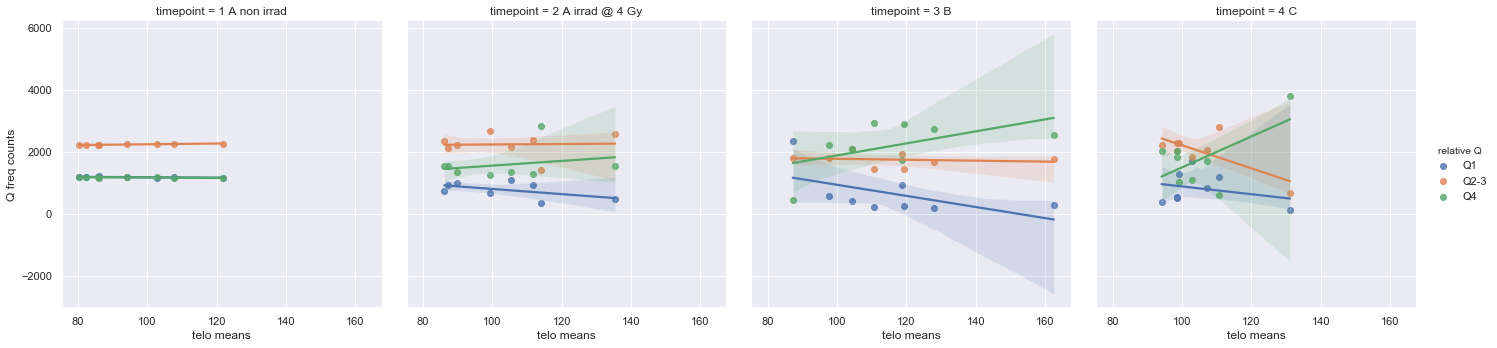

In [175]:
fig = plt.figure(figsize=(14,8))
sns.lmplot(x='telo means', y='Q freq counts', hue='relative Q', col='timepoint', data=melted_all_patients_df, truncate=True)

<Figure size 1440x1008 with 0 Axes>

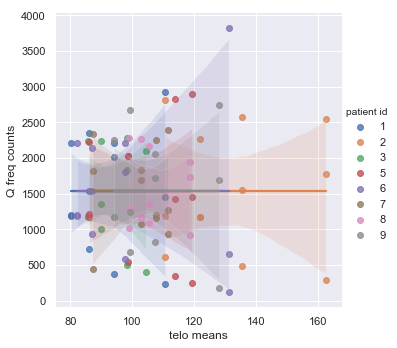

In [82]:
fig = plt.figure(figsize=(20,14))
sns.lmplot(x='telo means', y='Q freq counts', hue='patient id', data=melted_all_patients_df,
          truncate=True)
#shows that as telo means go up, more likely to see higher count in Q4, regardless of timepoint - not surprising

#what i really want to see is a plot of telo means vs. SW B & SW C . Q freq counts

In [85]:
# melted_all_patients_df

In [1]:
#playing w/ different data groupings

# half = all_patients_df.groupby('timepoint').get_group('1 A non irrad')[['patient id', 'timepoint', 'telo means']]

# ok = melted_all_patients_df.groupby('timepoint').get_group('3 B')[['patient id', 'timepoint', 'relative Q', 'Q freq counts']]

# half.rename(columns={'timepoint': 'PRE RAD THER'}, inplace=True)
# ok.rename(columns={'timepoint': 'IMMED POST RAD THER'}, inplace=True)

# half.sort_values(by='patient id', inplace=True)
# half.reset_index(drop=True, inplace=True)

# ok.sort_values(by='patient id', inplace=True)
# ok.reset_index(drop=True, inplace=True)

# merged = half.merge(ok, on=['patient id'])
# merged

In [18]:
def gen_missing_values_andimpute_or_randomsampledown(n_cells, telosPercell, astro_df, option=None):
    #if wanted to do for max. possible telomeres, just replace the subtraction with max telos
    # print('substracts second astro from first.. equalizing second to first')

    if astro_df.size > 4600:
        astro_dfsampled = astro_df.sample(4600)
        return astro_dfsampled

    if astro_df.size > 25 and astro_df.size <= 2300:
        missing_data_difference = abs( (n_cells * telosPercell) - astro_df.size )
        rsampled = astro_df.sample(missing_data_difference, replace=True, random_state=28)
        concat_ed = pd.concat([rsampled, astro_df], sort=False)
        np.random.shuffle(concat_ed.to_numpy())
        return concat_ed

    if astro_df.size > 25 and astro_df.size < 4600:
        missing_data_difference = abs( (n_cells * telosPercell) - astro_df.size )
        if option == 'rsamp':
            rsampled = astro_df.sample(missing_data_difference, random_state=28)
            # print(rsampled, rsampled.shape)
            concat_ed = pd.concat([rsampled, astro_df], sort=False)

            np.random.shuffle(concat_ed.to_numpy())
            # print(rsampled.shape, astro_df.shape, concat_ed.shape, 'rsamp', astro_df.describe(), pd.DataFrame(concat_ed).describe())
            return concat_ed
        else:
            return astro_df
    else:
        return astro_df


In [19]:
def histogram_stylizer_divyBins_byQuartile(fig, axs, n_bins, astroDF, astroquartile, astroname, axsNUMone, axsNUMtwo):

        astroarray = astroDF.to_numpy()

        N, bins, patches = axs[axsNUMone,axsNUMtwo].hist(astroarray, bins=n_bins, range=(0, 400), edgecolor='black')

        for a in range(len(patches)):
            if bins[a] <= np.quantile(astroquartile, 0.25):
                patches[a].set_facecolor('#fdff38')

            elif np.quantile(astroquartile, 0.25) < bins[a] and bins[a] <= np.quantile(astroquartile, 0.50):
                patches[a].set_facecolor('#d0fefe')

            elif np.quantile(astroquartile, 0.50) < bins[a] and bins[a] <= np.quantile(astroquartile, 0.75):
                patches[a].set_facecolor('#d0fefe')

            elif bins[a] > np.quantile(astroquartile, 0.75): 
                patches[a].set_facecolor('#ffbacd')


        axs[axsNUMone,axsNUMtwo].set_title('Histogram of ' + astroname + 's Telomeres')
        axs[axsNUMone,axsNUMtwo].set_xlabel('Bins of Individ. Telomeres')
        axs[axsNUMone,axsNUMtwo].set_ylabel('Freqs of Individ. Telomeres')
        axs[axsNUMone,axsNUMtwo].xaxis.set_major_locator(plt.MaxNLocator(12))

In [20]:
def capture_patient_sample_ID(file):
    """
    # print(len('SW2A non irrad'),
#       len('BJ1 for SW2_'),
#       len('BJ-hTERT for SW2_'),
#       len('SW10A non irrad'),
#       len('BJ1 for SW10_'),
#       len('BJ-hTERT for SW10_'),
#       len('SW8B'),
#       len('SW14B'),
#       len('SW1A irrad @ 4 Gy'),
#       len('SW12A irrad @ 4 Gy'))

# 14 12 17 15 13 18 4 5 17 18

empty = []
for file in files:
    num, num2 = capture_patient_sample_ID(file)
    empty.append(file[num:num2])
print(empty)

# ['2', '2', '2', '10', '10', '10', '8', '15', '1', '12']
    """

    if len(file) == 14:
        #it's patient id w/ 1 sample ID digit
        num = 2
        num2 = num + 1
        return num, num2

    elif len(file) == 12:
        #it's BJ1 ctrl w/ 1 sample ID digit
        num = 10
        num2 = num+ 1
        return num, num2

    elif 'hTERT' in file and len(file) == 17:
        #it's BJ-hTERT w/ 1 sample digit
        num = 15
        num2 = num + 1
        return num, num2

    elif len(file) == 15:
        #it's patient id w/ 2 sample ID digits
        num = 2
        num2 = num + 2
        return num, num2

    elif len(file) == 13:
        #it's BJ1 ctrl w/ 2 sample ID digits
        num = 10
        num2 = num + 2
        return num, num2

    elif 'hTERT' in file and len(file) == 18:
        # it's BJ-hTERT w/ 2 sample digits
        num = 15
        num2 = num + 2
        return num, num2
    
    elif len(file) == 4:
        #it's 2nd/3rd patient timepoint w/ 1 sample digit
        num = 2
        num2 = num + 1
        return num, num2
    
    elif len(file) == 5:
        #it's 2nd/3rd patient timepoint w/ 2 sample digits
        num = 2
        num2 = num + 2
        return num, num2
    
    elif '4 Gy' in file and len(file) == 17:
        # irrad @ 4 Gy 1 sample ID digit
        num = 2
        num2 = num + 1
        return num, num2
    
    elif '4 Gy' in file and len(file) == 18:
        # irrad @ 4 Gy 2 sample ID digits
        num = 2
        num2 = num + 2
        return num, num2